In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Punto 1

In [2]:
A = np.random.rand(4,2)
print(A)
print ('')
print ('')

print('El rango de la matriz A es: ', np.linalg.matrix_rank(A))
print('La traza de la matriz es: ', np.trace(A))

B = np.matmul(A,A.transpose())
C = np.matmul(A.transpose(),A)

value_B, vector_B = np.linalg.eig(B)
value_C, vector_C = np.linalg.eig(C)

print ('')
print ('')

print('Los autovalores del producto matricial A, A transpuesta son: ', value_B)
print('Los autovalores del producto matricial A transpuesta, A son: ', value_C)

print ('')
print ('')

print('Los autovectores del producto matricial A, A transpuesta son: ', vector_B)
print('Los autovectores del producto matricial A transpuesta, A son: ', vector_C)


[[0.97252607 0.07685807]
 [0.74179074 0.55747163]
 [0.32082638 0.80725334]
 [0.43300691 0.71432128]]


El rango de la matriz A es:  2
La traza de la matriz es:  1.5299976967059181


Los autovalores del producto matricial A, A transpuesta son:  [ 2.70026407e+00  5.64815580e-01 -1.47485731e-16  5.12982933e-17]
Los autovalores del producto matricial A transpuesta, A son:  [2.70026407 0.56481558]


Los autovectores del producto matricial A, A transpuesta son:  [[-0.47823744  0.76914271 -0.37784561  0.10534347]
 [-0.56335663  0.08461014  0.59904669 -0.41879247]
 [-0.46902569 -0.53318562 -0.64047032 -0.42485117]
 [-0.48366637 -0.3420142   0.29694028  0.79562372]]
Los autovectores del producto matricial A transpuesta, A son:  [[ 0.75636653 -0.65414805]
 [ 0.65414805  0.75636653]]


The rank is 2, which means that there are two linearly independent vectors.

The trace of the matrix is ​​the sum of the first element of the first row and the second of the second row.

For the determinant and the inverse, there are no values ​​as the matrix is ​​non-quadratic. (Matrices can be invertible if they have the same number of rows as columns, however they are not always invertible)

For the eigenvalues, they are the same for the first two numbers, however for the first exercise there are two more numbers equal to 0, this is due to the range established by the matrix multiplication.



# Punto 2

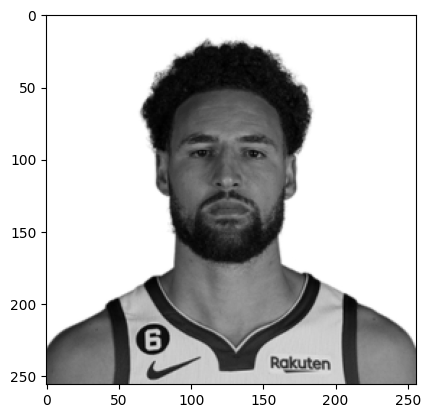

In [3]:
imgEspecial = cv2.imread('Especial.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(imgEspecial, cmap='gray')
plt.axis('on')
plt.show()

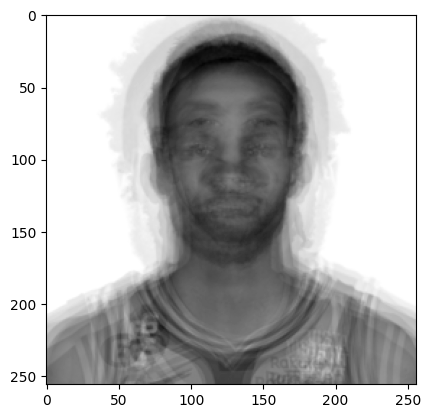

In [4]:
all_images_gray = []

golden_celtics = ['1.jpg', '2.jpg', '3.jpg','4.jpg', '5.jpg', '6.jpg',
                 '7.jpg', '8.jpg', '9.jpg', '11.jpg', '12.jpg','Especial.jpg']

for playernba in golden_celtics:
    img = cv2.imread(playernba, cv2.IMREAD_GRAYSCALE)
    all_images_gray.append(img)

average_face = np.mean(all_images_gray, axis=0)

plt.imshow(average_face, cmap='gray')
plt.axis('on')
plt.show()

In [5]:
distance = np.sqrt(np.mean((imgEspecial - average_face) ** 2))
print(f"La distancia entre Klay Thompson y el promedio es: {distance}")

La distancia entre Klay Thompson y el promedio es: 40.93722568772731


As interesting results of the exercise there are:

How can you take an image to numerical values, giving values ​​to one characteristic in this case the gray scale.

By taking similar photos of NBA roster players, an outline of a face can be identified and the body position is similar.

The difference of the selected player with respect to the average, although it can be a high error number in the gray scale, due to the complexity of the photos being completely aligned it can be a good value.

# Punto 3


Some of the advantages that can be had from creating unsupervised packages are:

* Code reuse

* Being able to customize scikit-learn tools to my needs

* For management and order

* For Speed

# Punto 4

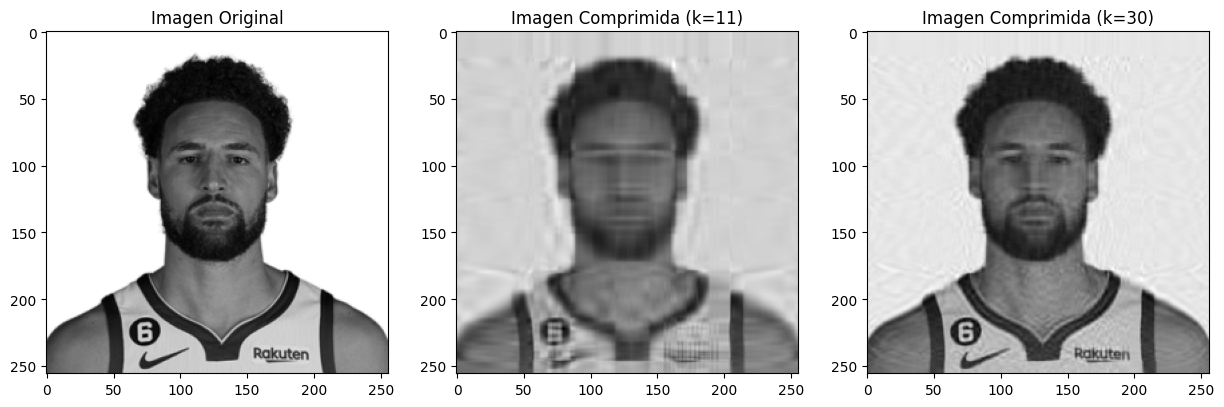

In [6]:
U, S, VT = np.linalg.svd(imgEspecial)

k = 11  # Número de valores singulares a conservar (ajusta según sea necesario)
kx = 30

U_truncated = U[:, :k]
S_truncated = np.diag(S[:k])
VT_truncated = VT[:k, :]

imagen_comprimida = U_truncated.dot(S_truncated).dot(VT_truncated)

U_truncated = U[:, :kx]
S_truncated = np.diag(S[:kx])
VT_truncated = VT[:kx, :]

imagen_comprimidab = U_truncated.dot(S_truncated).dot(VT_truncated)


# Mostrar la imagen original y la comprimida
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imgEspecial, cmap='gray')

plt.subplot(1, 3, 2)
plt.title(f'Imagen Comprimida (k={k})')
plt.imshow(imagen_comprimida, cmap='gray')

plt.subplot(1, 3, 3)
plt.title(f'Imagen Comprimida (k={kx})')
plt.imshow(imagen_comprimidab, cmap='gray')

plt.show()


In [7]:
distance = np.sqrt(np.mean((imgEspecial - imagen_comprimida) ** 2))
print(f"La distancia entre Klay Thompson y k11 es: {distance}")

distance = np.sqrt(np.mean((imgEspecial - imagen_comprimidab) ** 2))
print(f"La distancia entre Klay Thompson y k30 es: {distance}")

La distancia entre Klay Thompson y k11 es: 15.65481976325466
La distancia entre Klay Thompson y k30 es: 7.330157028670079


For the exercise again use the player chosen for the special photo, I find that at a lower number of K selected the image loses quality. For k = 11 the image takes shape, but the details of the face are not identified; For k=30 we do find a much more defined face, however the background color is different from the white of the original.

# Punto 5

In [19]:
mnist = load_digits(return_X_y=False)
y = pd.DataFrame(mnist.target)
X = pd.DataFrame(mnist.data)

y_sub = y[y[0].isin([1, 9])]
X_sub = X.iloc[y_sub.index]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.20, random_state=42)
y_train.squeeze().shape
X_train.shape
model = LogisticRegression(max_iter=1000)
#model = LogisticRegression()

model.fit(X_train, y_train.squeeze())
y_pred = model.predict(X_test)

print('El accuracy de la regresión logística con todas las características es', accuracy_score(y_test, y_pred))


El accuracy de la regresión logística con todas las características es 0.9863013698630136


Different tests were done with different pairs of numbers, which when applying logistic regression in the classification did not give 1. Looking at the lines of some samples, 1 and 9 were selected as the most similar.

The reason why the value is close to or 1 is because the strokes are well marked and contrasted within the number of pixels that the image has.

# Punto 6

In [21]:
import PCA
import time

start_time = time.time()
pca = PCA.PCA_scratch(2)

# Ajusta PCA a tus datos
pca.fit(X_sub)

# Transforma tus datos originales en las nuevas coordenadas reducidas
X_reducido_scratch = pca.transform(X_sub)

X_train, X_test, y_train, y_test = train_test_split(X_reducido_scratch, y_sub, test_size=0.4, random_state=42)
y_train.squeeze().shape
X_train.shape
model = LogisticRegression()

model.fit(X_train, y_train.squeeze())
y_pred = model.predict(X_test)

print('El accuracy de la regresión logística con dos características después de aplicar nuestro PCA es', accuracy_score(y_test, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"El tiempo transcurrido con nuestro PCA fue {elapsed_time} segundos")

import SVD

start_time = time.time()
svd = SVD.SVD(2)

U_trun, S_trun, VT_trun = svd.transform(X_sub)

X_reducido_svd = U_trun.dot(S_trun).dot(VT_trun)

X_train, X_test, y_train, y_test = train_test_split(X_reducido_svd, y_sub, test_size=0.4, random_state=42)
y_train.squeeze().shape
X_train.shape
model = LogisticRegression()

model.fit(X_train, y_train.squeeze())
y_pred = model.predict(X_test)

print('El accuracy de la regresión logística con dos características después de aplicar nuestro SVD es', accuracy_score(y_test, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"El tiempo transcurrido con nuestro SVD fue {elapsed_time} segundos")

El accuracy de la regresión logística con dos características después de aplicar nuestro PCA es 0.903448275862069
El tiempo transcurrido con nuestro PCA fue 0.014835834503173828 segundos
El accuracy de la regresión logística con dos características después de aplicar nuestro SVD es 0.8896551724137931
El tiempo transcurrido con nuestro SVD fue 0.028802871704101562 segundos


Applying the PCA and SVD methods that were carried out in point 3 and reducing the mnist model to 2 dimensions, we see that the PCA method stores better information for this model.

Additionally, the PCA method is twice as fast as the SVD, an important point in case the model grows.

# Punto 7

In [22]:
from sklearn.decomposition import PCA

start_time = time.time()
pca = PCA(2)

# Ajusta PCA a tus datos
pca.fit(X_sub)

# Transforma tus datos originales en las nuevas coordenadas reducidas
X_reducido = pca.transform(X_sub)


# Si deseas obtener los componentes principales (vectores) y los autovalores (varianza explicada)
componentes_principales = pca.components_
autovalores = pca.explained_variance_

X_train, X_test, y_train, y_test = train_test_split(X_reducido, y_sub, test_size=0.4, random_state=42)
y_train.squeeze().shape
X_train.shape
model = LogisticRegression()

model.fit(X_train, y_train.squeeze())
y_pred = model.predict(X_test)

print('El accuracy de la regresión logística con dos características después de hacer PCA de sklearn es', accuracy_score(y_test, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"El tiempo transcurrido con el PCA de sklearn fue {elapsed_time} segundos")

from sklearn.decomposition import TruncatedSVD

start_time = time.time()
# Crear una instancia de TruncatedSVD y especificar el número de componentes principales
n_components = 2  # Número de componentes principales que deseas
svd = TruncatedSVD(n_components=n_components)

# Aplicar SVD a los datos
svd.fit(X_sub)

# Obtener las componentes principales y la matriz reducida
components = svd.components_
X_reducido_svd_skl = svd.transform(X_sub)

X_train, X_test, y_train, y_test = train_test_split(X_reducido_svd_skl, y_sub, test_size=0.4, random_state=42)
y_train.squeeze().shape
X_train.shape
model = LogisticRegression()

model.fit(X_train, y_train.squeeze())
y_pred = model.predict(X_test)

print('El accuracy de la regresión logística con dos características después de hacer SVD de sklearn es', accuracy_score(y_test, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"El tiempo transcurrido con el SVD de sklearn fue {elapsed_time} segundos")

El accuracy de la regresión logística con dos características después de hacer PCA de sklearn es 0.903448275862069
El tiempo transcurrido con el PCA de sklearn fue 0.04015827178955078 segundos
El accuracy de la regresión logística con dos características después de hacer SVD de sklearn es 0.8896551724137931
El tiempo transcurrido con el SVD de sklearn fue 0.05145144462585449 segundos


The results are similar to point 6, because the unsupervised packages created did not move anything from the main sklearn functions.

The time issue is greater for models where sklearn is applied directly in the code. Which shows one of the advantages of having unsupervised packages.

# Punto 8

Some treatments that can be performed to improve the result of a PCA and make it more robust:

* Normalize data

* Remove outliers

* Search by k most optimal algorithm

* Generate Cross Validation for the results

* Use incremental PCA when you have a very large data set


# Punto 9

UMAP (Uniform Manifold Approximation and Projection) is a nonlinear dimensionality reduction technique used for visualizing and analyzing high-dimensional data. Unlike linear methods like PCA, UMAP is nonlinear, allowing it to capture complex relationships in the data.

Some Key Points are:
Preservation of Structure: UMAP is based on the preservation of data structure. It aims to maintain both local and global data structure in the lower-dimensional space, preserving semantic relationships and clusters.

Versatility: UMAP is commonly used to visualize high-dimensional data, such as images, genomics, or text, in two or three dimensions. It can also serve as a preprocessing step before applying machine learning algorithms.

Computational Efficiency: UMAP is computationally efficient, making it suitable for large datasets.

Adjustable Hyperparameters: UMAP offers various adjustable hyperparameters, such as the distance metric used for measuring point similarity and the number of neighbors considered. These hyperparameters can impact the quality of the final projection.

Underlying Mathematical:

UMAP is based on two mathematical principles:

Local Connectivity: UMAP models data points as connected in a topological space, focusing on preserving the local structure of the data. It uses fuzzy simplicial sets to capture these local relationships.

Optimization: UMAP optimizes a low-dimensional representation of the data that minimizes a cost function. This cost function combines aspects of preserving data connectivity and minimizing the cross-entropy of pairwise similarities between data points in the original and reduced spaces.


# Punto 10

LDA is a supervised dimensionality reduction and classification technique commonly used for feature extraction and classification tasks. Its primary goal is to find a linear combination of features that best separates classes in a dataset while maximizing the between-class variance and minimizing the within-class variance.

Key Points:

Supervised: LDA is a supervised technique that uses class labels to find a linear projection that maximizes class separability.

Dimensionality Reduction: LDA reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace while preserving class discrimination.

Maximizing Class Separation: LDA aims to maximize the distance between the means of different classes (between-class scatter) and minimize the spread of data points within each class (within-class scatter).

Linear Transformation: LDA finds a linear transformation matrix to perform the projection. This matrix maximizes the Fisher's Linear Discriminant (FLD) criterion.

Underlying Mathematical Principles

LDA makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.

The model uses Bayes Theorem to estimate the probabilities. Briefly Bayes’ Theorem can be used to estimate the probability of the output class (k) given the input (x) using the probability of each class and the probability of the data belonging to each class:

P(Y=x|X=x) = (PIk * fk(x)) / sum(PIl * fl(x))

Where PIk refers to the base probability of each class (k) observed in your training data (e.g. 0.5 for a 50-50 split in a two class problem). In Bayes’ Theorem this is called the prior probability.

PIk = nk/n

The f(x) above is the estimated probability of x belonging to the class. A Gaussian distribution function is used for f(x). Plugging the Gaussian into the above equation and simplifying we end up with the equation below. This is called a discriminate function and the class is calculated as having the largest value will be the output classification (y):

Dk(x) = x * (muk/siga^2) – (muk^2/(2*sigma^2)) + ln(PIk)

Dk(x) is the discriminate function for class k given input x, the muk, sigma^2 and PIk are all estimated from your data.

# Punto 11